In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading DataSet

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
#Isolate Numeric Discrete from Numeric Continuous Columns
numerical_discrete=[]
numerical_continuous=[]
#for num in num_coltypes:
for num in list(df.describe().columns):
    if df[num].nunique()<10:
        if num!='target':
            numerical_discrete.append(num)
    else:
        numerical_continuous.append(num)

In [7]:
#Numerical Discrete Features
numerical_discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [8]:
#Numerical Continuous Features
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### Resolving Outliers In Continuous Featrues

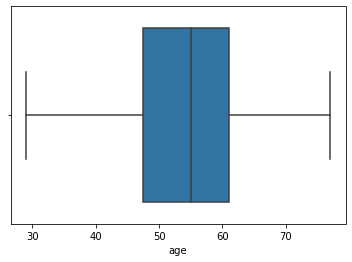

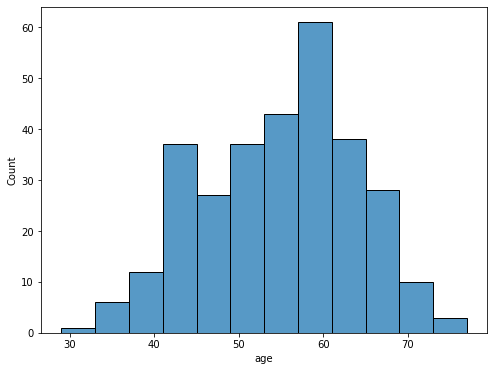

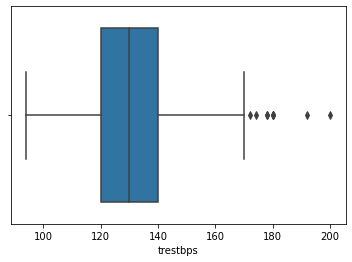

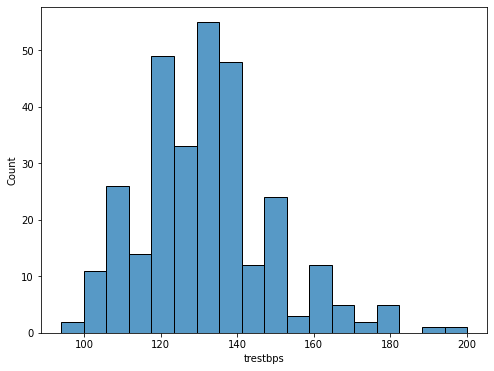

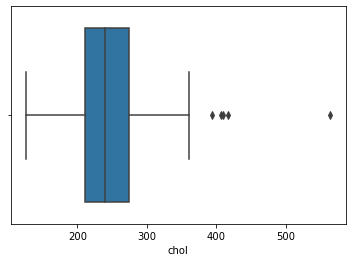

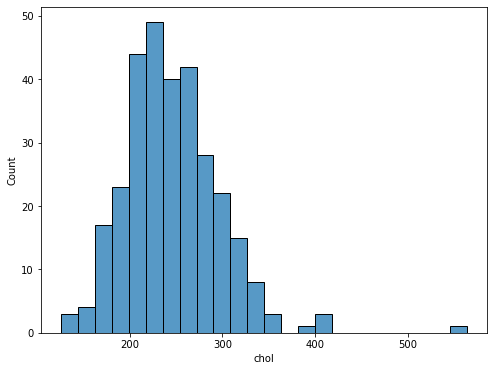

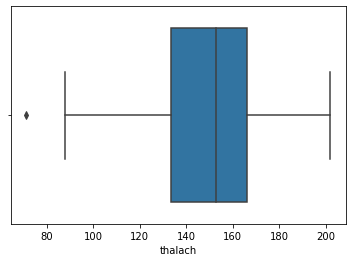

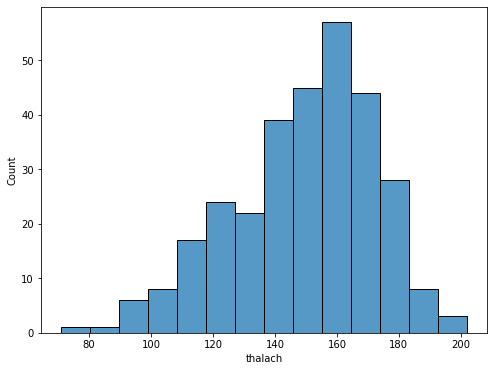

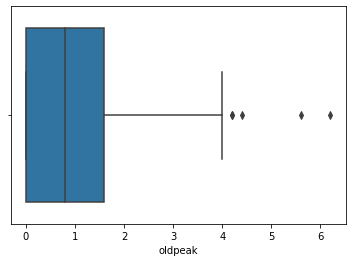

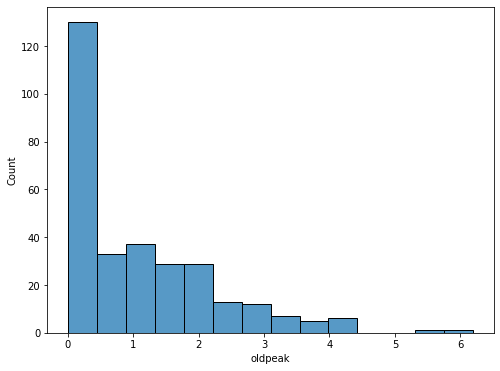

In [9]:
for col in numerical_continuous:
    sns.boxplot(data=df,x=col)
    plt.figure(figsize = (8, 6))
    sns.histplot(data=df,x=col)
    plt.show()

#### Outliers identified for Features('trestbps', 'chol', 'thalach', 'oldpeak')

In [10]:
def outlier_range(datacolumn):
    sorted(datacolumn)
    #determine Lower and Upper Quartiles
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    #detect Ranges
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

def remove_outlier(lower_lim,upper_lim,DataFrame,mfeature):
    #remove Outliners
    no_outlier=DataFrame.loc[(DataFrame[mfeature] < upper_lim) & (DataFrame[mfeature] > lower_lim)]
    return no_outlier
    
def plot_NewGraph(Dataframe,col):
    sns.boxplot(data=Dataframe,x=col)
    plt.figure(figsize = (8, 6))
    sns.histplot(data=Dataframe,x=col)
    plt.show()
    
outlier_features=list(['trestbps', 'chol', 'thalach', 'oldpeak'])

#### Outliers resolved for Numeric Continuous Features

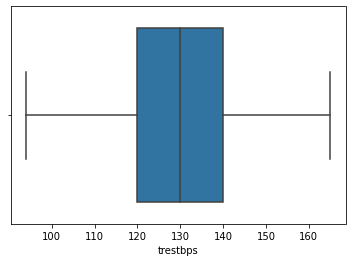

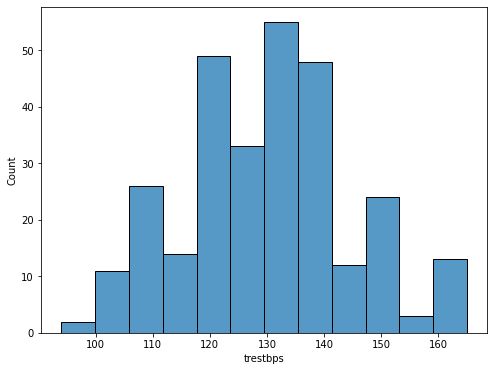

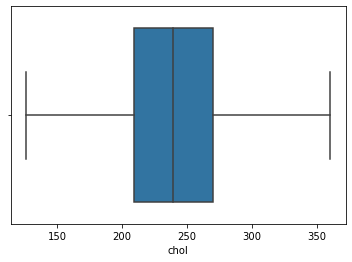

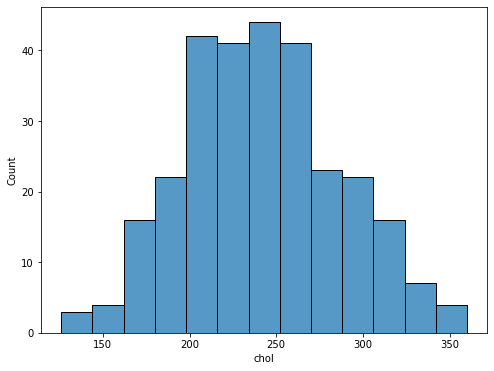

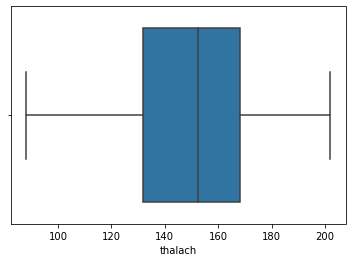

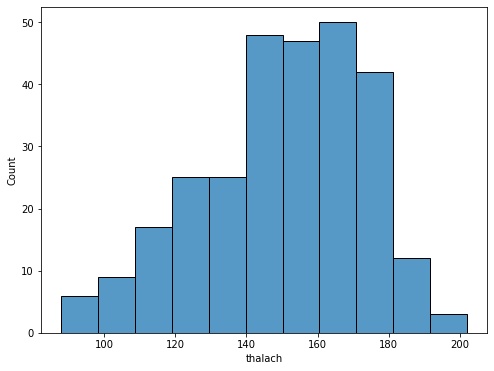

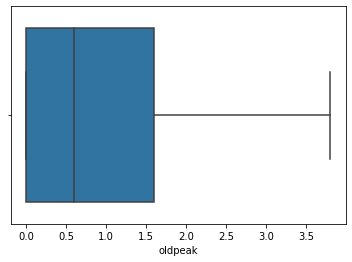

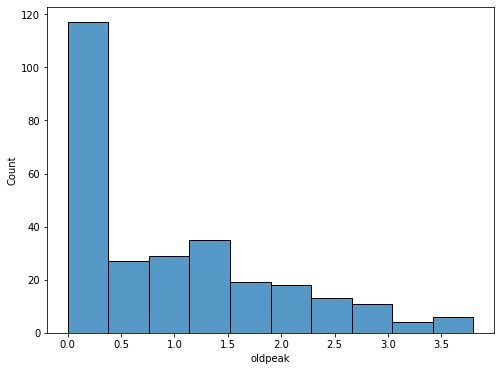

In [11]:
for lst in outlier_features:
    low_limit,upper_limit=outlier_range(df[lst])
   # resolved_Outlier=remove_outlier(low_limit,upper_limit,df,lst)
    df=remove_outlier(low_limit,upper_limit,df,lst)
    #plot New Graph
    plot_NewGraph(df,lst)

#### Binning All Continuous Column Variables (Except Oldpeak)

In [12]:
df['age_binned'] = pd.qcut(df.age, q=[0, .25, .50, .75, 1])
df['trestbps_binned'] = pd.qcut(df.trestbps, q=[0, .25, .50, .75, 1])
df['chol_binned'] = pd.qcut(df.chol, q=[0, .25, .50, .75, 1])
df['thalach_binned'] = pd.qcut(df.thalach, q=[0, .25, .50, .75, 1])

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned,trestbps_binned,chol_binned,thalach_binned
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60.0, 77.0]","(140.0, 165.0]","(209.5, 239.0]","(132.5, 153.0]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.999, 46.0]","(120.0, 130.0]","(239.0, 269.5]","(168.0, 202.0]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(28.999, 46.0]","(120.0, 130.0]","(125.999, 209.5]","(168.0, 202.0]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(54.0, 60.0]","(93.999, 120.0]","(209.5, 239.0]","(168.0, 202.0]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(54.0, 60.0]","(93.999, 120.0]","(269.5, 360.0]","(153.0, 168.0]"


#### Feature Selection 

In [14]:
X=df.drop(['target'],axis=1)
y=df['target']

In [15]:
df.nunique()

age                 41
sex                  2
cp                   4
trestbps            41
chol               141
fbs                  2
restecg              3
thalach             88
exang                2
oldpeak             35
slope                3
ca                   5
thal                 4
target               2
age_binned           4
trestbps_binned      4
chol_binned          4
thalach_binned       4
dtype: int64

In [16]:
#Option 1: Label Encoder (applied to >2 categories per variable)
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
le=LabelEncoder()

In [17]:
#drop the binned columns and encode
X.drop(columns=['age','trestbps', 'chol', 'thalach'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

X['age'] =le.fit_transform(X['age_binned'])
X['trestbps']=le.fit_transform(X['trestbps_binned'])
X['chol']=le.fit_transform(X['chol_binned'])
X['thalach']=le.fit_transform(X['thalach_binned'])


X.drop(columns=['age_binned','trestbps_binned', 'chol_binned', 'thalach_binned'], inplace=True)

X.head()


,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age,trestbps,chol,thalach
0,1,3,1,0,0,2.3,0,0,1,3,3,1,1
1,1,2,0,1,0,3.5,0,0,2,0,1,2,3
2,0,1,0,0,0,1.4,2,0,2,0,1,0,3
3,1,1,0,1,0,0.8,2,0,2,2,0,1,3
4,0,0,0,1,1,0.6,2,0,2,2,0,3,2


In [18]:
#Feature Selection Techniques 
#Try the Backward Elimination Technique
import statsmodels.api as sm

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues


const       8.017317e-13
sex         1.695530e-04
cp          2.674369e-06
fbs         7.316043e-01
restecg     2.099893e-01
exang       1.432965e-02
oldpeak     1.093484e-03
slope       9.866426e-02
ca          4.007766e-05
thal        1.138700e-03
age         1.808311e-01
trestbps    5.101313e-01
chol        2.516868e-01
thalach     9.788570e-02
dtype: float64

In [19]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age']


#### Splice and Scale Data

In [20]:
X=X[['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age']]

In [21]:
#Splicing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [23]:
#Robust Scaling
X_train_rs = pd.DataFrame(RobustScaler().fit_transform(X_train), columns=X_train.columns)
X_train_rs.head()

,sex,cp,exang,oldpeak,slope,ca,thal,age
0,0.0,-0.5,1.0,0.714286,0.0,0.0,1.0,-0.5
1,0.0,0.5,0.0,1.714286,0.0,0.0,0.0,0.5
2,-1.0,-0.5,1.0,1.000000,0.0,1.0,1.0,0.5
3,-1.0,0.5,0.0,0.000000,1.0,0.0,0.0,0.0
4,-1.0,0.5,1.0,0.571429,-1.0,0.0,0.0,-0.5


In [24]:
X_test_rs = pd.DataFrame(RobustScaler().fit_transform(X_test), columns=X_test.columns)

#### Confirm and Deal with Data Imbalance

In [25]:
#Confirming Data Imbalance or Balance 

target_0 = df[df.target == 0].target.count() / df.target.count()
target_1 = df[df.target == 1].target.count() / df.target.count()

print(target_0)
print(target_1)

0.4336917562724014
0.5663082437275986


Data seems somehow balanced

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample= SMOTE(random_state=42)


In [27]:
X_train_rs_over, y_train_over = oversample.fit_resample(X_train_rs, y_train)
print(Counter(y_train_over))

#Apply to x_test_set
X_test_rs_over, y_test_over = oversample.fit_resample(X_test_rs, y_test)
print(Counter(y_test_over))

Counter({0: 113, 1: 113})
Counter({0: 45, 1: 45})


In [28]:
#Embedded Algorithms
#6. Apply algorithm 
# Models to be tested: Logistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [30]:
#Compute the training score of each models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_rs_over, y_train_over)
    train_score = round(classifier.score(X_train_rs_over, y_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_test_rs_over, y_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.86, 0.89, 0.91, 0.99, 0.99]
[0.86, 0.88, 0.88, 0.77, 0.81]


In [31]:
#%% time
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_rs_over, y_train_over)
    train_score = cross_val_score(classifier, X_train_rs_over, y_train_over, cv=13)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, X_test_rs_over, y_test_over, cv=13)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.85, 0.84, 0.85, 0.81, 0.87]
[0.84, 0.82, 0.87, 0.87, 0.88]


Hence The Random Forest Seems to be the best here

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(X_train_rs_over, y_train_over)
rf_pred = cross_val_predict(rf, X_test_rs_over, y_test_over, cv=13)
print(roc_auc_score(y_test_over, rf_pred))

0.8888888888888888


In [33]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [34]:
rf_params = {"n_estimators": [10,20,50,100,1200],
        "max_depth": [None,70,80,90,100],
        "max_features": ['auto', 'sqrt'],
        "min_samples_split": [2,4, 6],
        "min_samples_leaf":  [1, 2,4]}

In [36]:
from sklearn.model_selection import GridSearchCV
# Set n_jobs using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=rf_params,
                      cv=2, # 2-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train_rs_over, y_train_over);

Fitting 2 folds for each of 450 candidates, totalling 900 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=None, max_features=a

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=None, max_featur

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=None, max_features=a

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=None, max_featur

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=None, max_features=s

[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=70, max_features=auto, min_samples

[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=70, max_features=auto, min_samples

[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.9s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   2.0s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=70, max_features=sqrt, min_samples_

[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.9s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=70, max_features=sqrt, min_samples_le

[CV]  max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=80, max_features=auto, min_samples_leaf=

[CV]  max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=80, max_features=auto, min_samples_leaf=

[CV]  max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.9s
[CV] max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.9s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.9s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=80, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.9s
[CV] max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.9s
[CV] max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=90, max_features=auto, min_samples_leaf=

[CV]  max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=90, max_features=auto, min_samples_leaf=

[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.9s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=90, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=100, max_features=auto, min_sam

[CV]  max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=100, max_features=auto, min_sam

[CV]  max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=sqrt, min_

[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.9s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.8s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=sqrt, min_

[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.8s
[CV] max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=100, max_features=sqrt, mi

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  6.5min finished


In [37]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 10}

In [54]:
rf_params = {"n_estimators": [10],
        "max_depth": [70],
        "max_features":['sqrt'],
        "min_samples_split": [6],
        "min_samples_leaf": [4]}

In [55]:
# Retrain the Model with Optimized Parameters 
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=rf_params,
                      cv=2, # 2-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train_rs_over, y_train_over);

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [56]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test_rs_over)

# Evaluate the predictions
#gs_metrics = evaluate_preds(y_test_over, gs_y_preds)
gs_y_preds


array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [ ]:
#Classification Report

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test_over, gs_y_preds))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        45
           1       0.79      0.93      0.86        45

    accuracy                           0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.86      0.84      0.84        90



In [58]:
from sklearn.metrics import confusion_matrix

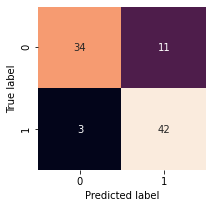

In [59]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(y_test_over, gs_y_preds)

plot_conf_mat(conf_mat)

In [60]:
from sklearn.metrics import roc_auc_score

# Make predictions with probabilities
y_probs = gs_clf.predict_proba(X_test_rs_over)
y_probs = y_probs[:, 1]
roc_auc_score(y_test_over, y_probs)

0.9204938271604939

In [62]:
from sklearn.metrics import roc_curve

# Keep the probabilites of the positive class only
#y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test_over, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02222222, 0.02222222, 0.02222222,
       0.04444444, 0.04444444, 0.06666667, 0.06666667, 0.11111111,
       0.11111111, 0.13333333, 0.13333333, 0.15555556, 0.15555556,
       0.2       , 0.2       , 0.22222222, 0.22222222, 0.24444444,
       0.24444444, 0.33333333, 0.33333333, 0.42222222, 0.42222222,
       0.48888889, 0.53333333, 0.82222222, 0.86666667, 0.95555556,
       1.        ])

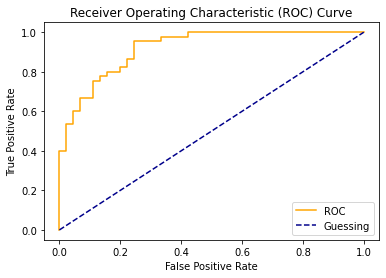

In [63]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

The Threshold should be at 0.4  because that is the period when the FP starts to correlate with TP

#### Saving Model

In [97]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_2.joblib")

['gs_random_forest_model_2.joblib']